In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(0)

# Model definition

### Perceptron

Let's divide the space of the training set $X$'s examples in two parts using a straight line, so that examples of different classes lie in opposite half-spaces.

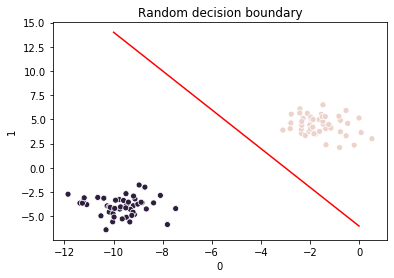

In [2]:
from sklearn.datasets import make_blobs

X_train, y_train = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
y_train[y_train == 0] = -1

sns.scatterplot(x=0, y=1, hue=y_train, data=pd.DataFrame(X_train), legend=False)

X = np.linspace(-10, 0)
y = -2 * X - 6

plt.plot(X, y, 'r')
plt.title('Random decision boundary')

plt.show()

Then, for a new example $x$ we can determine which half-space it belongs to, and consequently which class it belongs to with this hypothesis:
$$y_{pred} = h_\theta(x) = sign(\theta^T x)$$
If $h_\theta(x) > 0$, we assign the positive class, if $h_\theta(x) < 0$ we assign the negative class.  
If $h_\theta(x) = 0$, there is an equal probability of $x$ belonging to either class, so it's not important which class we assign it.

In [3]:
def h_perceptron(x, theta):
    sign = np.sign(np.dot(theta.T, x))
    
    if sign == 0:
        return 1
    return sign

The training algorithm for perceptrons is a bit different from gradient descent (image taken from https://towardsdatascience.com/perceptron-learning-algorithm-d5db0deab975):
![alt see the URL](https://miro.medium.com/max/645/1*PbJBdf-WxR0Dd0xHvEoh4A.png)

In [4]:
import random

def train_perceptron(X_train, y_train, starting_theta, epochs=5):
    train = list(zip(X_train, y_train))
    theta = np.copy(starting_theta)
    
    for epoch in range(epochs):
        x, y = random.choice(train)

        if y == 1 and h_perceptron(x, theta) < 0:
            theta += x
        elif y == -1 and h_perceptron(x, theta) >= 0:
              theta -= x
    
    return theta

# Perceptron in practice

### 1. Generating data

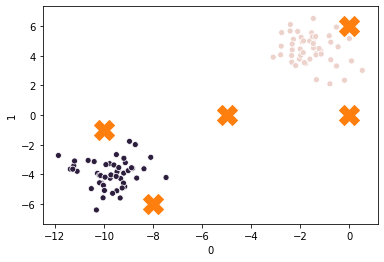

In [5]:
X1, y_train = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1)
y_train[y_train == 0] = -1

sns.scatterplot(x=0, y=1, hue=y_train, data=pd.DataFrame(X1), legend=False)

X2 = np.array([[-10, -1], [0, 0], [-8, -6], [-5, 0], [0, 6]]) # some random points on the scatterplot
plt.scatter(x=X2[:, 0], y=X2[:, 1], marker='X', s=20 ** 2)

plt.show()

### 2. Training the model

In [6]:
X_train = np.append(np.ones((X1.shape[0], 1)), X1, axis=1)
X_test = np.append(np.ones((X2.shape[0], 1)), X2, axis=1)

thetas = train_perceptron(X_train, y_train, np.random.normal(size=X_train.shape[1]), epochs=10000)
y_test = np.sign(np.matmul(X_test, thetas))

y_test, thetas

(array([ 1.,  1.,  1.,  1., -1.]),
 array([ 1.76405235, -6.33052825, -8.23611542]))

In [7]:
k = -thetas[1] / thetas[2]
b = -thetas[0] / thetas[2]

line_X1 = np.linspace(-12, 0)
line_X2 = k * line_X1 + b

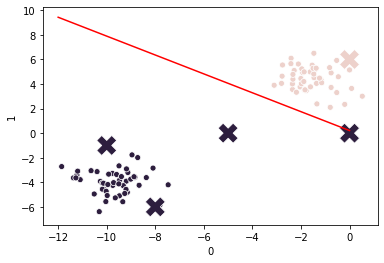

In [8]:
sns.scatterplot(x=0, y=1, hue=y_train, data=pd.DataFrame(X1), legend=False)
sns.scatterplot(x=0, y=1, hue=y_test, data=pd.DataFrame(X2), legend=False, marker='X', s=20 ** 2)

plt.plot(line_X1, line_X2, 'r')

plt.show()